# Codigos para tratamento dos dados e algumas análises iniciais
* PCA
* Valores Faltantes
* Outillers
* Correlações

### Bibliotecas 

In [32]:
### Libs auxiliares
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, LabelBinarizer

## Base (iris)

In [13]:
iris = datasets.load_iris()

X = iris.data
Y = iris.target

### Padronizar as variáveis

In [14]:
scaler = StandardScaler()
X_p = pd.DataFrame(scaler.fit_transform(X))

### PCA

In [21]:
pca = PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, 
          iterated_power='auto', random_state=42)

pca.fit(X_p)

PCA(random_state=42)

In [22]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

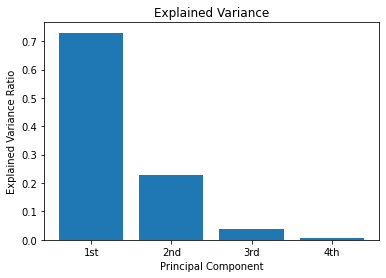

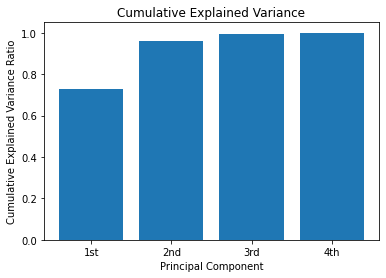

   Component  Explained Variance  Cumulative Explained Variance
0          1            0.729624                       0.729624
1          2            0.228508                       0.958132
2          3            0.036689                       0.994821
3          4            0.005179                       1.000000


In [23]:
range_x = np.arange(4)

plt.bar(range_x,pca.explained_variance_ratio_)
plt.xticks(range_x, ('1st', '2nd', '3rd', '4th'))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance')
plt.show()

plt.bar(range_x,np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range_x, ('1st', '2nd', '3rd', '4th'))
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.show()

d = {'Component': np.r_[1:len(pca.explained_variance_ratio_)+1], 
     'Explained Variance': pca.explained_variance_ratio_, 
     'Cumulative Explained Variance': np.cumsum(pca.explained_variance_ratio_)}
df = pd.DataFrame(data=d)

print(df)

Text(0, 0.5, 'Cumulative Explained Variance')

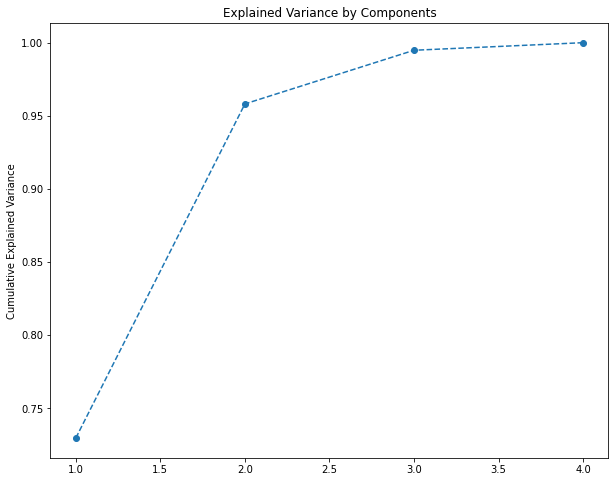

In [25]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variance by Components")
plt.ylabel("Cumulative Explained Variance")

In [26]:
pca = PCA(n_components=2, random_state=42)

In [27]:
pca.fit(X_p)

PCA(n_components=2, random_state=42)

In [28]:
score_pca = pca.fit_transform(X_p)

## Base (Tennis)

In [30]:
fileName   = 'tennis.csv'
df = pd.read_csv(fileName)
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [35]:
number = LabelEncoder()

df2 = df.copy()

df2['Outlook'] = number.fit_transform(df['Outlook'])
df2['Temperature'] = number.fit_transform(df['Temperature'])
df2['Humidity'] = number.fit_transform(df['Humidity'])
df2['Wind'] = number.fit_transform(df['Wind'])
df2['Play Tennis'] = number.fit_transform(df['Play Tennis'])

features = ["Outlook", "Temperature", "Humidity", "Wind"]
target = "Play Tennis"
df2.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [36]:
binar = LabelBinarizer()

outlook = pd.get_dummies(df['Outlook'])
temp = pd.get_dummies(df['Temperature'])

humid = pd.DataFrame(binar.fit_transform(df['Humidity']),columns=['Humidity'])
wind = pd.DataFrame(binar.fit_transform(df['Wind']),columns=['Wind'])

df3 = pd.concat([outlook,temp,humid,wind],axis=1)
df3.head()

,Overcast,Rain,Sunny,Cool,Hot,Mild,Humidity,Wind
0,0,0,1,0,1,0,0,1
1,0,0,1,0,1,0,0,0
2,1,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,1
4,0,1,0,1,0,0,1,1


In [39]:
names_to_dummies = ['Outlook','Temperature','Humidity','Wind', 'Play Tennis']
df4 = pd.get_dummies(df, columns=names_to_dummies)
df4.head()

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak,Play Tennis_No,Play Tennis_Yes
0,0,0,1,0,1,0,1,0,0,1,1,0
1,0,0,1,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1,0,1
3,0,1,0,0,0,1,1,0,0,1,0,1
4,0,1,0,1,0,0,0,1,0,1,0,1


### KS

In [ ]:
from scipy import stats

c = [5, 3, 3, 11, 8, 7, 1, 5, 4, 9]
d = [2, 1, 1, 4, 10, 1, 1, 1, 3, 2]

a = stats.ks_2samp(c,d)
a

### MAPE

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    a = np.mean(np.abs((y_true - y_pred)/y_true))*100
    return a

y_pred =  [0.15,0.3,0.6,0.1]
y_true = [0.12,0.4,0.2,0.2]
print("mape ",mean_absolute_percentage_error(y_true, y_pred))